<a href="https://colab.research.google.com/github/trishlamishra14/StockAnalysis/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [232]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import matplotlib.ticker as mtick
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
!pip install chart-studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Defining the start and end dates to retrieve the stock data.**

In [233]:
start_date= datetime.datetime(2015, 1, 1) # the format is YYYY-MM-DD
end_date= datetime.datetime(2022, 12, 30)

**Uploading the Apple and Microsoft stock data files.**

In [234]:
from google.colab import files
uploaded = files.upload()

Saving apple.csv to apple (2).csv


In [235]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Microsoft_Stock.csv to Microsoft_Stock (6).csv


In [236]:
apple.head(2)
microsoft.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476


**Reading the Apple and Microsoft CSV files into pandas DataFrames.**

In [237]:
apple=pd.read_csv("apple.csv")

In [238]:
microsoft=pd.read_csv("Microsoft_Stock.csv")

 **Converting the 'Date' column into a datetime object, setting it as an index, and selecting data between 2015-01-01 and 2021-03-31.**

In [239]:
microsoft['Date']=pd.to_datetime(microsoft.Date)

In [240]:
microsoft['Date'] = microsoft['Date'].dt.date

In [241]:
microsoft = microsoft.set_index('Date')

In [242]:
microsoft

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322
2015-04-02,40.66,40.74,40.12,40.29,37487476
2015-04-06,40.34,41.78,40.18,41.55,39223692
2015-04-07,41.61,41.91,41.31,41.53,28809375
2015-04-08,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25,235.30,236.94,231.57,232.34,34061853
2021-03-26,231.55,236.71,231.55,236.48,25479853
2021-03-29,236.59,236.80,231.88,235.24,25227455


In [243]:
apple['Date'] = pd.to_datetime(apple['Date'])


<ipython-input-243-8d59a2167a9a>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [244]:
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-31,28.007500,28.632500,28.000000,28.190001,25.740059,224917200
1,2015-01-09,27.537500,27.969999,26.840000,26.930000,24.589560,307383600
2,2015-02-09,27.557501,28.084999,27.282499,28.084999,25.644180,247555200
3,2015-03-09,28.122499,28.195000,27.510000,27.592501,25.194494,212935600
4,2015-04-09,27.242500,27.612499,27.127501,27.317499,24.943388,199985200
...,...,...,...,...,...,...,...
1758,2022-08-24,167.320007,168.110001,166.250000,167.529999,167.529999,53841500
1759,2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
1760,2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500
1761,2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000


In [245]:
apple15 = apple[apple['Date'].between('2015-01-01', '2021-03-31')]

In [246]:
apple15

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-31,28.007500,28.632500,28.000000,28.190001,25.740059,224917200
1,2015-01-09,27.537500,27.969999,26.840000,26.930000,24.589560,307383600
2,2015-02-09,27.557501,28.084999,27.282499,28.084999,25.644180,247555200
3,2015-03-09,28.122499,28.195000,27.510000,27.592501,25.194494,212935600
4,2015-04-09,27.242500,27.612499,27.127501,27.317499,24.943388,199985200
...,...,...,...,...,...,...,...
1555,2021-02-11,148.660004,151.570007,148.649994,150.020004,149.184052,69122000
1556,2021-03-11,150.389999,151.970001,149.820007,151.490005,150.645874,54511500
1575,2021-01-12,167.479996,170.300003,164.529999,164.770004,164.090988,152052500
1576,2021-02-12,158.740005,164.199997,157.800003,163.759995,163.085144,136739200


In [247]:
apple15= apple15.set_index('Date')

In [248]:
apple15

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-31,28.007500,28.632500,28.000000,28.190001,25.740059,224917200
2015-01-09,27.537500,27.969999,26.840000,26.930000,24.589560,307383600
2015-02-09,27.557501,28.084999,27.282499,28.084999,25.644180,247555200
2015-03-09,28.122499,28.195000,27.510000,27.592501,25.194494,212935600
2015-04-09,27.242500,27.612499,27.127501,27.317499,24.943388,199985200
...,...,...,...,...,...,...
2021-02-11,148.660004,151.570007,148.649994,150.020004,149.184052,69122000
2021-03-11,150.389999,151.970001,149.820007,151.490005,150.645874,54511500
2021-01-12,167.479996,170.300003,164.529999,164.770004,164.090988,152052500


In [249]:
microsoft

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322
2015-04-02,40.66,40.74,40.12,40.29,37487476
2015-04-06,40.34,41.78,40.18,41.55,39223692
2015-04-07,41.61,41.91,41.31,41.53,28809375
2015-04-08,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25,235.30,236.94,231.57,232.34,34061853
2021-03-26,231.55,236.71,231.55,236.48,25479853
2021-03-29,236.59,236.80,231.88,235.24,25227455


**Plotting the Apple and Microsoft stock prices between 2015-01-01 and 2021-03-31 using seaborn.**

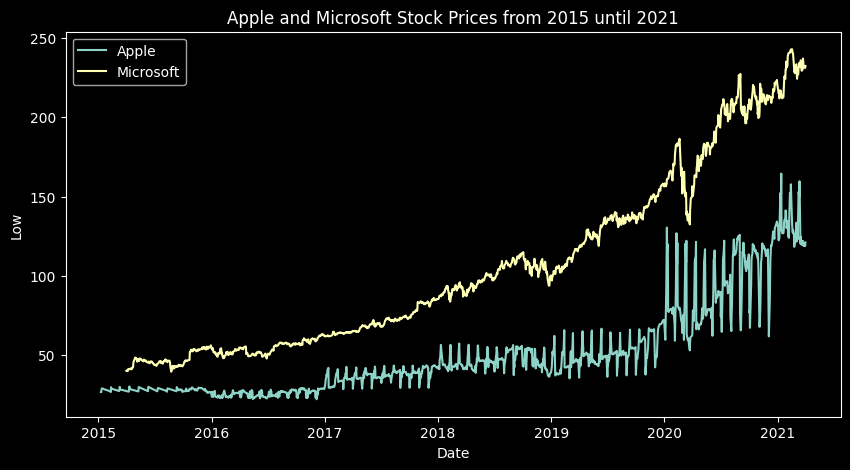

In [250]:
style.use('dark_background')
plt.figure(figsize=(10,5))
ax1= sns.lineplot(x=apple15.index, y= apple15['Low'], label='Apple')

ax2= sns.lineplot(x=microsoft.index, y=microsoft['Low'], label='Microsoft');

plt.title("Apple and Microsoft Stock Prices from 2015 until 2021")

plt.legend()

plt.show()

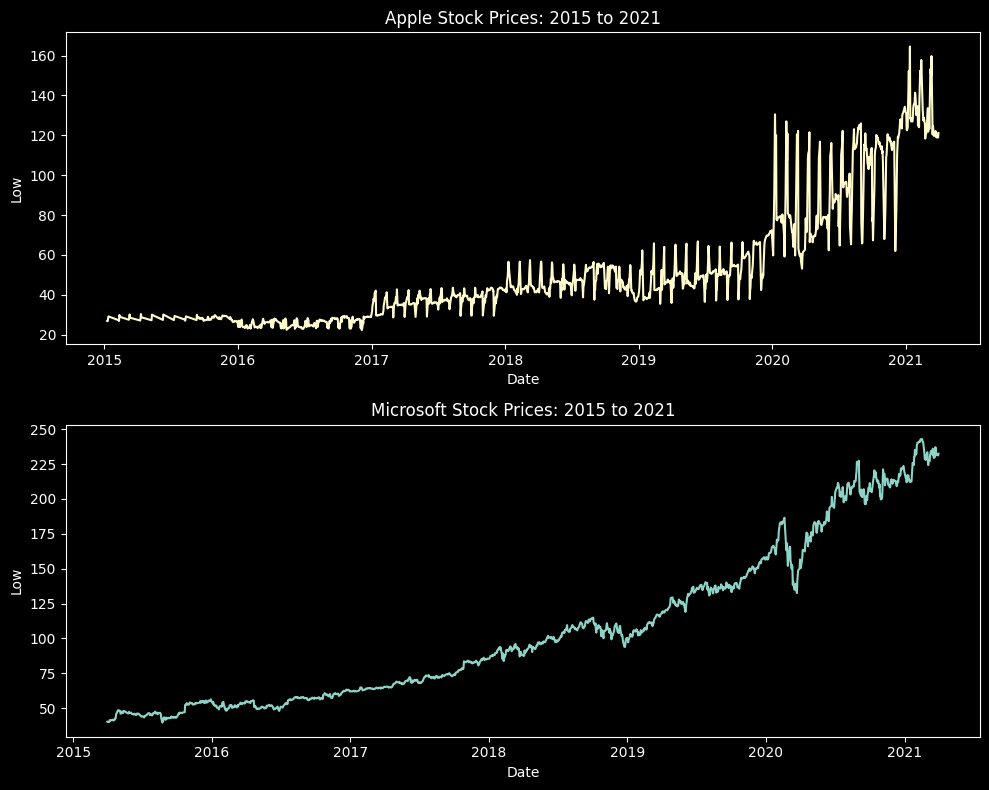

In [251]:

style.use('dark_background')
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
sns.lineplot(x=apple15.index, y= apple15['Low'], color= 'lemonchiffon')
plt.title('Apple Stock Prices: 2015 to 2021')

plt.subplot(2, 1, 2)
ax2= sns.lineplot(x=microsoft.index, y=microsoft['Low'])
plt.title('Microsoft Stock Prices: 2015 to 2021')
plt.tight_layout();

In [252]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1.763000e+03
mean,73.458462,74.290824,72.670074,73.517628,72.039095,1.258506e+08
std,48.082843,48.708133,47.474062,48.115467,48.595050,6.005775e+07
min,22.500000,22.917500,22.367500,22.584999,20.949615,4.100000e+07
25%,36.455000,36.831249,36.258751,36.608750,34.535809,8.547100e+07
50%,50.080002,50.439999,49.652500,50.167500,48.708790,1.092376e+08
75%,121.005001,122.965001,119.535000,121.094997,119.951920,1.471762e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,5.334788e+08


In [253]:
print(apple.isnull().sum())
print(microsoft.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [254]:
apple = apple.fillna(apple.mean())
microsoft = microsoft.fillna(microsoft.mean())

<ipython-input-254-005b2d3772b6>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



**Scaling the Apple and Microsoft stock data using MinMaxScaler and creating box plots to visualize the scaled data.**

In [255]:
scaler = MinMaxScaler()
apple= scaler.fit_transform(apple[['Open','High','Low','Close','Volume']])


In [256]:
apple = pd.DataFrame(apple, columns=['Open','High','Low','Close','Volume'])


<Axes: >

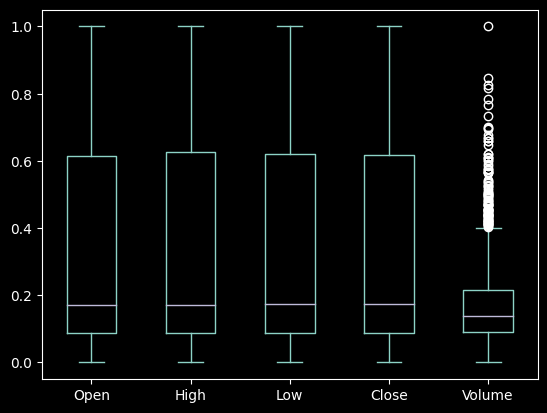

In [257]:
apple.plot(kind='box')


In [258]:
scaler = MinMaxScaler()
microsoft= scaler.fit_transform(microsoft[['Open','High','Low','Close','Volume']])


In [259]:
microsoft = pd.DataFrame(microsoft, columns=['Open','High','Low','Close','Volume'])

<Axes: >

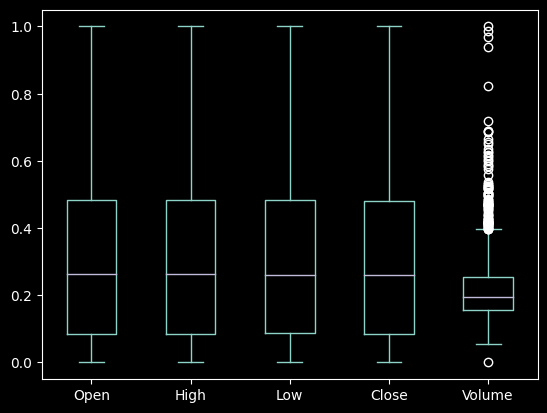

In [260]:
microsoft.plot(kind='box')

**Using OLS (ordinary least squares) linear regression to fit a model to the Apple and Microsoft stock data and printing the model summary.**

In [261]:
import statsmodels.api as sm
X_microsoft = microsoft['Open']
y_microsoft = microsoft['Close']
X_microsoft = sm.add_constant(X_microsoft)
model_microsoft = sm.OLS(y_microsoft, X_microsoft).fit()
X_apple = apple['Open']
y_apple = apple['Close']
X_apple = sm.add_constant(X_apple)
model_apple = sm.OLS(y_apple, X_apple).fit()

print("Microsoft Model Summary:")
print(model_microsoft.summary())
print("\n")
print("Apple Model Summary:")
print(model_apple.summary())



Microsoft Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.643e+06
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        10:14:28   Log-Likelihood:                 5080.1
No. Observations:                1511   AIC:                        -1.016e+04
Df Residuals:                    1509   BIC:                        -1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      

**Creating scatter plots of the Microsoft and Apple data with the predicted values using the fitted linear regression model.**

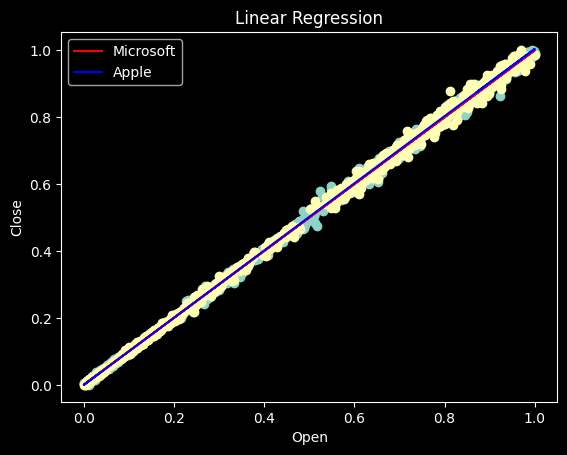

In [263]:

plt.scatter(X_microsoft['Open'], y_microsoft)
plt.plot(X_microsoft['Open'], model_microsoft.predict(X_microsoft), color='red', label='Microsoft')
plt.scatter(X_apple['Open'], y_apple)
plt.plot(X_apple['Open'], model_apple.predict(X_apple), color='blue', label='Apple')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Linear Regression')
plt.legend()


**Calculating the correlation matrix for Apple and Microsoft and visualizing it using a heatmap.**

<Axes: >

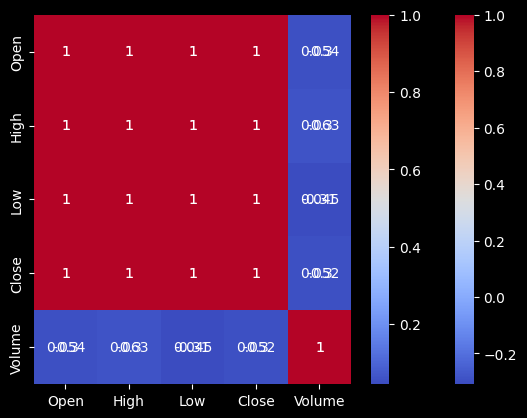

In [264]:

corr_matrix_apple = apple.corr()
corr_matrix_microsoft = microsoft.corr()
sns.heatmap(corr_matrix_apple, cmap='coolwarm', annot=True)
sns.heatmap(corr_matrix_microsoft, cmap='coolwarm', annot=True)

**Splitting the data into training and testing sets, fitting a linear regression model to the training set, and calculating the mean squared error on the testing set.**

In [265]:

scaler = MinMaxScaler()
apple_scaled = scaler.fit_transform(apple)
microsoft_scaled = scaler.fit_transform(microsoft)

# Split data into train and test sets
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(
    apple_scaled[:, :-1], apple_scaled[:, -1], test_size=0.3, random_state=42)

X_train_msft, X_test_msft, y_train_msft, y_test_msft = train_test_split(
    microsoft_scaled[:, :-1], microsoft_scaled[:, -1], test_size=0.3, random_state=42)

# Train linear regression model
lr_apple = LinearRegression()
lr_apple.fit(X_train_apple, y_train_apple)

lr_msft = LinearRegression()
lr_msft.fit(X_train_msft, y_train_msft)

# Make predictions
y_pred_apple = lr_apple.predict(X_test_apple)
y_pred_msft = lr_msft.predict(X_test_msft)

# Calculate MSE
mse_apple = mean_squared_error(y_test_apple, y_pred_apple)
mse_msft = mean_squared_error(y_test_msft, y_pred_msft)

print("MSE for Apple:", mse_apple)
print("MSE for Microsoft:", mse_msft)

MSE for Apple: 0.008571021601320969
MSE for Microsoft: 0.005363000368157946


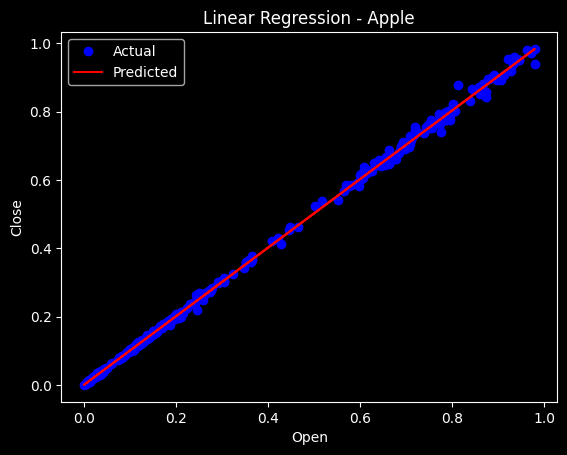

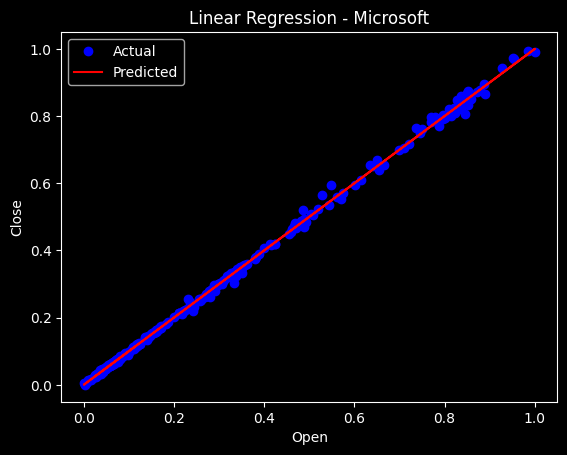

In [266]:

X = apple[['Open']]
X = sm.add_constant(X)

y = apple['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr_apple = LinearRegression()
lr_apple.fit(X_train, y_train)

y_pred_apple = lr_apple.predict(X_test)

plt.plot(X_test['Open'], y_test, 'bo', label='Actual')
plt.plot(X_test['Open'], y_pred_apple, 'r-', label='Predicted')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Linear Regression - Apple')
plt.legend()
plt.show()
X = microsoft[['Open']]
X = sm.add_constant(X)

y = microsoft['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr_microsoft = LinearRegression()
lr_microsoft.fit(X_train, y_train)


y_pred_microsoft = lr_microsoft.predict(X_test)
plt.plot(X_test['Open'], y_test, 'bo', label='Actual')
plt.plot(X_test['Open'], y_pred_microsoft, 'r-', label='Predicted')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Linear Regression - Microsoft')
plt.legend()
plt.show()
